In [2]:
import sys
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 1

In [16]:
%aimport log_plotter
from log_plotter import get_accuracies, get_levels, plot_levels

In [5]:
logdir = '/h/iman/Code/nuqsgd/runs'
lg_tags = ['estim_sgd', 'nuq_method', 'nuq_sym', 'nuq_inv','nuq_mul']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
orders = ['SuperSGD', 'ALQ-N', 'AMQ-N', 'Qinf', 'TRN', 'NUQ,p=0.5', 'SGD', 'ALQ', 'AMQ']
lg_replace = [('p2_', 'P='), ('estim_sgd', 'SGD'), ('nuq_mul_', 'p='), ('nuq_bucket_size_', 'BS='), ('ngpu_', 'GPU='), ('nuq_method', ''), ('_q', 'Q'), ('nuq_inv_', 'Inv'), ('nuq_sym_', 'Sym'), ('_amq_nb', 'AMQ'), ('_amq', 'AMQ-N'), ('_alq_nb', 'ALQ'), ('_trn', 'TRN'), ('_alq', 'ALQ-N'), ('_qinf', 'Qinf'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$'), ('_l2q', 'L2Q'), ('_none', 'SuperSGD'), ('nuq_layer_1', 'w/o layers'), ('nuq_layer_0', 'w/ layers'),('_nuq', 'NUQ')]
tag_names = ['est_var', 'nb_error', 'Vloss', 'Tloss', 'Vacc']

In [12]:
def format_levels(unf_levels):
    reformed_levels = {}
    for key, vals in unf_levels.items():
        for method in vals[0]:
            # sample data ((0.0, 76.3499984741211), 'NUQ')
            method_name = method[1]
            value = method[0]

            if method_name not in list(reformed_levels):
                reformed_levels[method_name] = [value]
            else:
                reformed_levels[method_name].append(value)
    return reformed_levels

# ResNet-32

In [33]:
patterns = ['.*runs_cifar10_full/.*(f23|r2)_(000.*estim_sgd|037.*nuq_method_none.*|.*resnet32.*nuq_bits_3.*nuq_bucket_size_16.*,(?!(.*nuq_sym.*|.*nuq_inv)))'] # resnet110 for paper
levels = get_levels(patterns, lg_replace, lg_tags, logdir, 8)

OrderedDict([('ALQ', [-1.0, -0.13037915527820587, -0.018461534380912782, -0.00508661475032568, 0.0046255383640527725, 0.017798911780118942, 0.12570485472679138, 1.0]), ('ALQ-N', [-1.0, -0.12515452206134797, -0.017935097590088843, -0.00487457774579525, 0.0047873626463115215, 0.01783512905240059, 0.12379290908575058, 1.0]), ('AMQ', [-1.0, -0.23219155371189118, -0.05391341000795365, -0.01265745423734188, 0.01265745423734188, 0.05431222543120384, 0.23304982483386993, 1.0]), ('AMQ-N', [-1.0, -0.23163762986660003, -0.05365607142448425, -0.012483714148402214, 0.012483714148402214, 0.05381407588720322, 0.2319786101579666, 1.0]), ('NUQ,p=0.5', [-1.0, -0.5, -0.25, -0.125, 0.125, 0.25, 0.5, 1.0]), ('Qinf', [-1.0, -0.7142857313156128, -0.4285714328289032, -0.1428571492433548, 0.1428571492433548, 0.4285714328289032, 0.7142857313156128, 1.0]), ('TRN', [-1.0, 0.0, 1.0])])
['ALQ', 'AMQ', 'ALQ-N', 'AMQ-N', 'Qinf', 'TRN', 'NUQ,p=0.5']


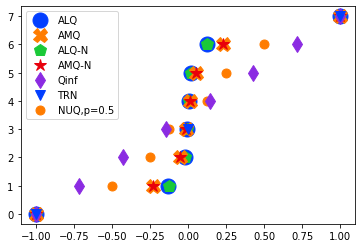

In [50]:
plot_levels(format_levels(levels), 'resnet-32')

# ResNet-110

In [36]:
patterns = ['.*runs_cifar10_full/.*(f21|r2)_(000.*estim_sgd|037.*nuq_method_none.*|.*resnet110.*nuq_bits_3.*nuq_bucket_size_16.*,(?!(.*nuq_sym.*|.*nuq_inv)))'] # resnet110 for paper
acc = get_accuracies(patterns, lg_replace, lg_tags, logdir, latex=True, notitle=True)

======= Vacc ========
90.97\% & $\pm$ & 0.01
90.95\% & $\pm$ & 0.06
91.02\% & $\pm$ & 0.03
89.53\% & $\pm$ & 0.05
84.55\% & $\pm$ & 0.05
86.65\% & $\pm$ & 0.08
91.16\% & $\pm$ & 0.04
91.05\% & $\pm$ & 0.05
88.75\% & $\pm$ & 0.04
======= Tacc ========
100.00\% & $\pm$ & 0.01
99.99\% & $\pm$ & 0.00
99.99\% & $\pm$ & 0.00
99.99\% & $\pm$ & 0.00
89.22\% & $\pm$ & 0.08
99.87\% & $\pm$ & 0.01
99.97\% & $\pm$ & 0.01
100.00\% & $\pm$ & 0.00
99.95\% & $\pm$ & 0.01
